In [1]:

import pandas as pd

df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']
df



,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [2]:
print(df.info())
print(df['Sentiment'].value_counts())
print(df['Topic'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
Topic
Microsoft                    2400
MaddenNFL                    2400
TomClancysRainbowSix         2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_13048\285125685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


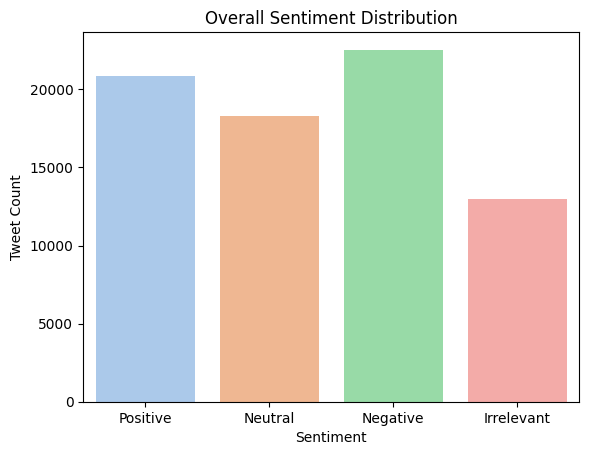

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


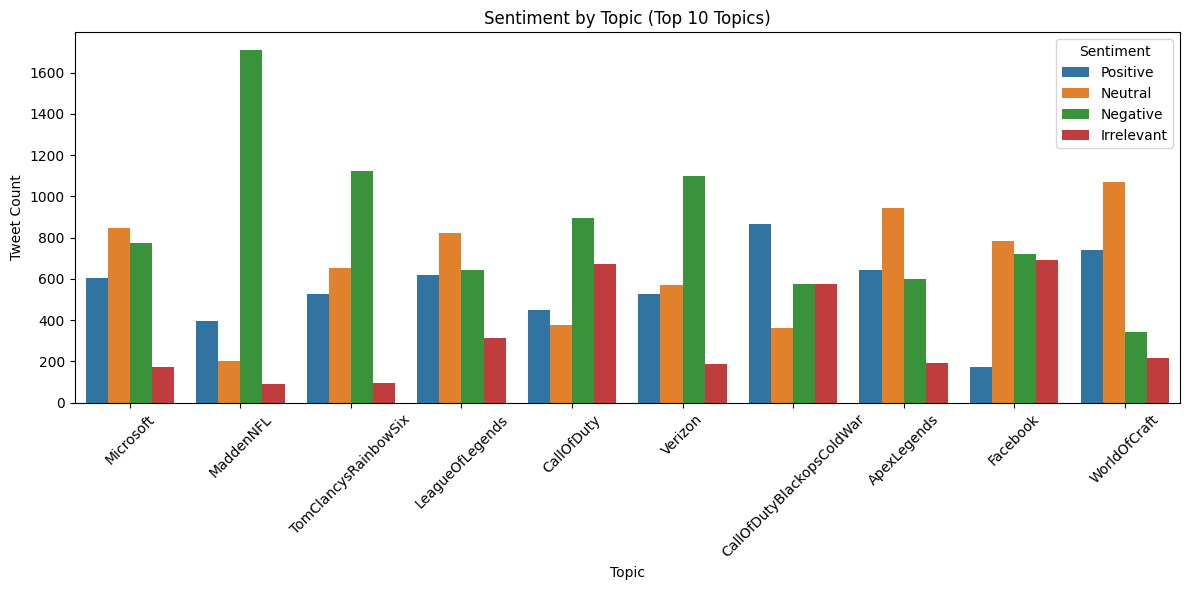

In [15]:
#This shows how people feel about each brand/topic.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Topic', hue='Sentiment', order=df['Topic'].value_counts().index[:10])
plt.title("Sentiment by Topic (Top 10 Topics)")
plt.xlabel("Topic")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


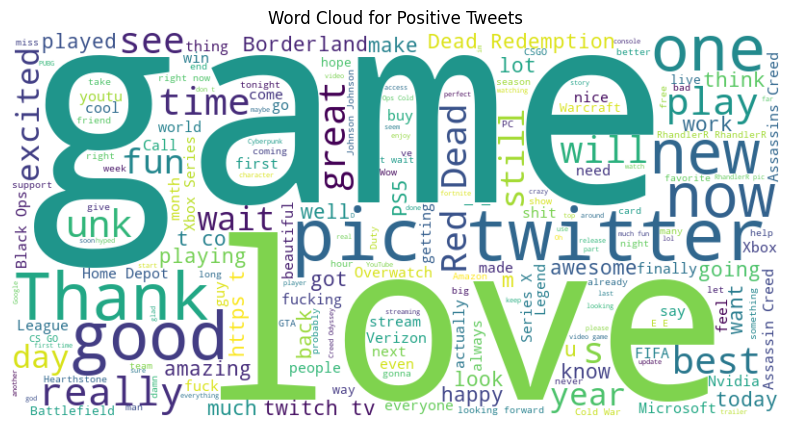

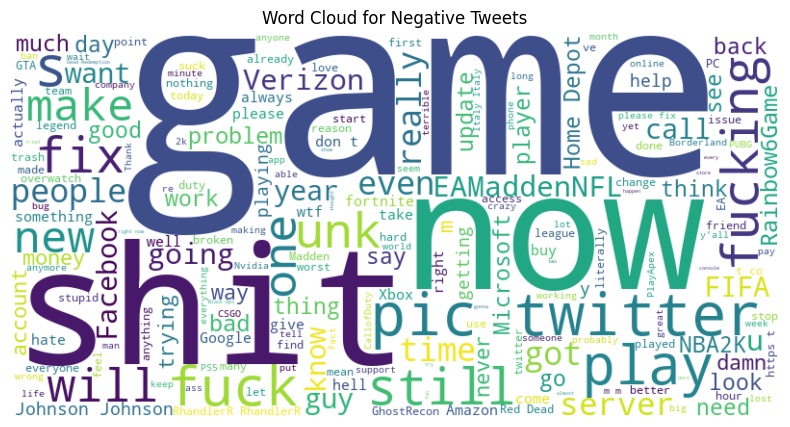

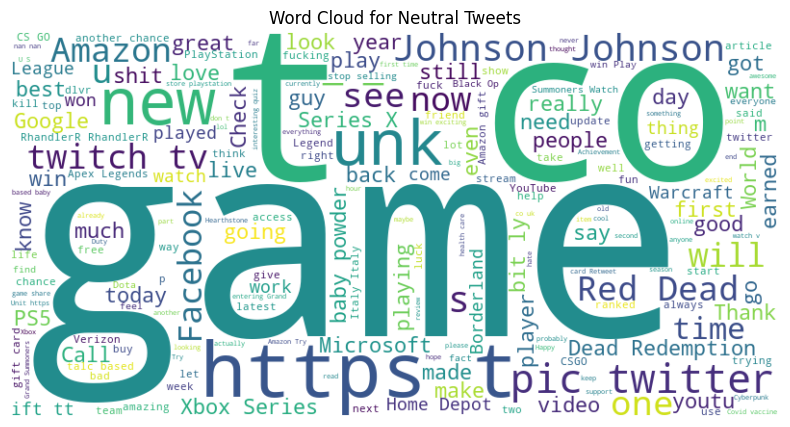

In [17]:
#creates three distinct word clouds, each representing the most frequently used words in tweets of a specific sentiment—Positive, Negative, or Neutral.
from wordcloud import WordCloud

for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()



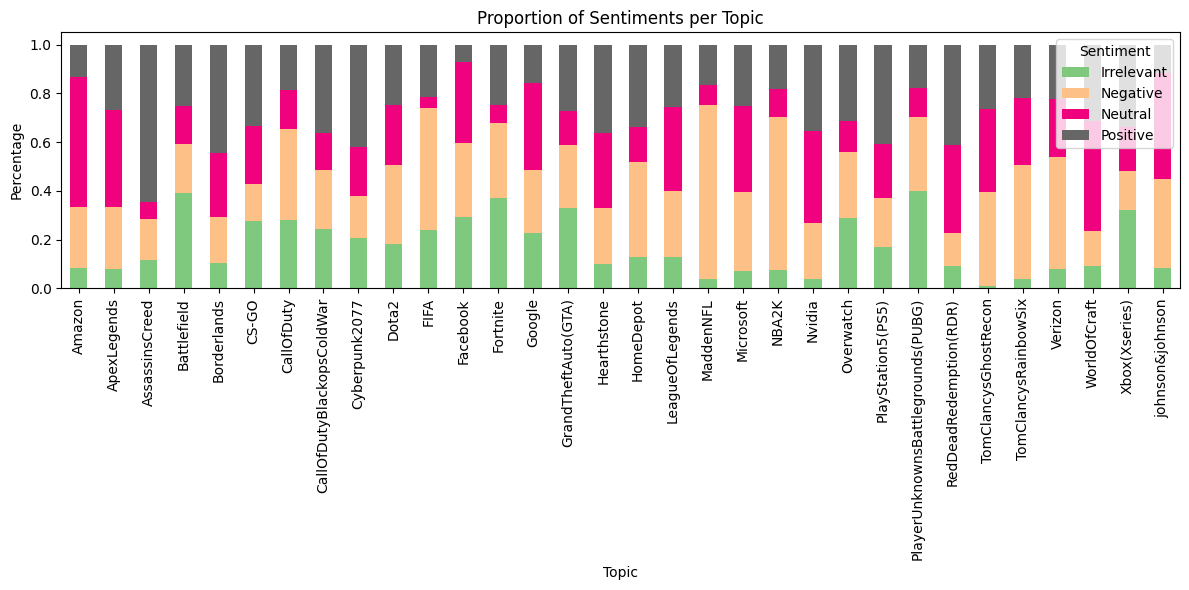

In [18]:
sentiment_by_topic = df.groupby(['Topic', 'Sentiment']).size().unstack().fillna(0)
sentiment_by_topic_percent = sentiment_by_topic.div(sentiment_by_topic.sum(axis=1), axis=0)

sentiment_by_topic_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Proportion of Sentiments per Topic')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()
